In [3]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from collections import Counter
from IPython.display import Image  


# Configuring the notebook
sns.set()
%matplotlib inline

# Reading the data
credit_card = pd.read_csv('F:/MS/UMich-Dearborn/Sem1/CIS 5570/Project/creditcard.csv')
credit_card.head()
     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Data Analysis
pd.set_option("display.float", "{:.2f}".format)

credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [5]:
#Check for null values or missing values 
credit_card.isnull().sum().sum()

0

In [6]:
#The data consists of 284807 rows and 31 columns. We checked for missing values, there are none. 'Time' and 'Amount' are the only 
#features that have not been transformed. Here, 'Time' contains seconds elapsed between each transaction and he first transaction 
#of the dataset. 'Amount' is the transaction Amount.
credit_card[['Time', 'Amount']].describe()

,Time,Amount
count,284807.00,284807.00
mean,94813.86,88.35
std,47488.15,250.12
min,0.00,0.00
25%,54201.50,5.60
50%,84692.00,22.00
75%,139320.50,77.16
max,172792.00,25691.16


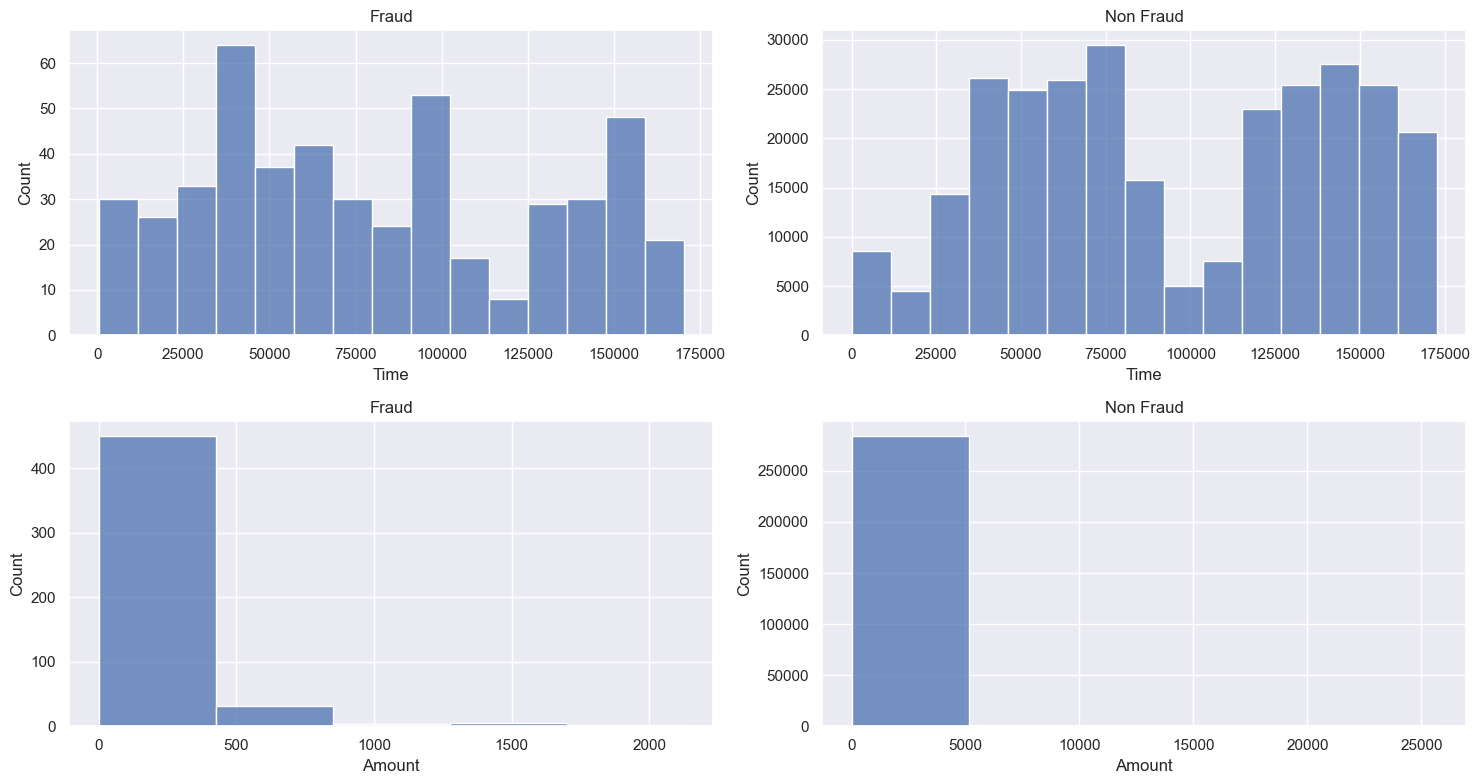

In [12]:
#Histogram for 'Time' and 'Amount' features considering the Class column, which represents the frauds.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
sns.histplot(credit_card['Time'][credit_card['Class'] == 1], bins=15, ax=ax1)
sns.histplot(credit_card['Time'][credit_card['Class'] == 0], bins=15, ax=ax2)

sns.histplot(credit_card['Amount'][credit_card['Class'] == 1], bins=5, ax=ax3)
sns.histplot(credit_card['Amount'][credit_card['Class'] == 0], bins=5, ax=ax4)

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')
plt.tight_layout()
plt.show()

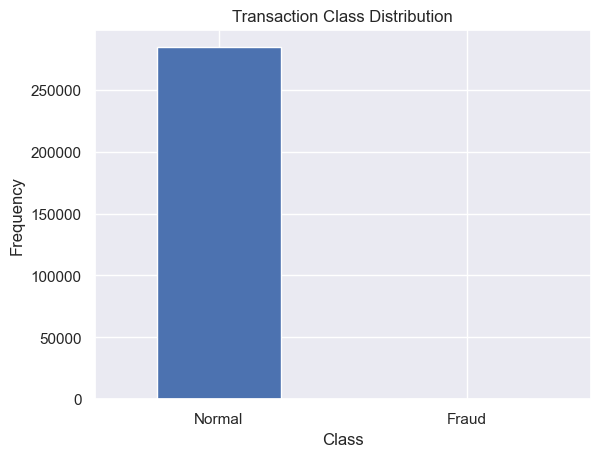

In [17]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(credit_card['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency');

In [18]:
credit_card.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
#We are able to see how imbalanced the data is the dataset. Most of the transactions are non-fraud. 
#If we use this DataFrame as the base for our predictive models and analysis, we might get a lot of errors, 
#and  algorithms might overfit since they will “assume” that most transactions are not a fraud. 
#we want model to detect patterns that give signs of fraud.
fraud = credit_card[credit_card['Class']==1]
normal = credit_card[credit_card['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


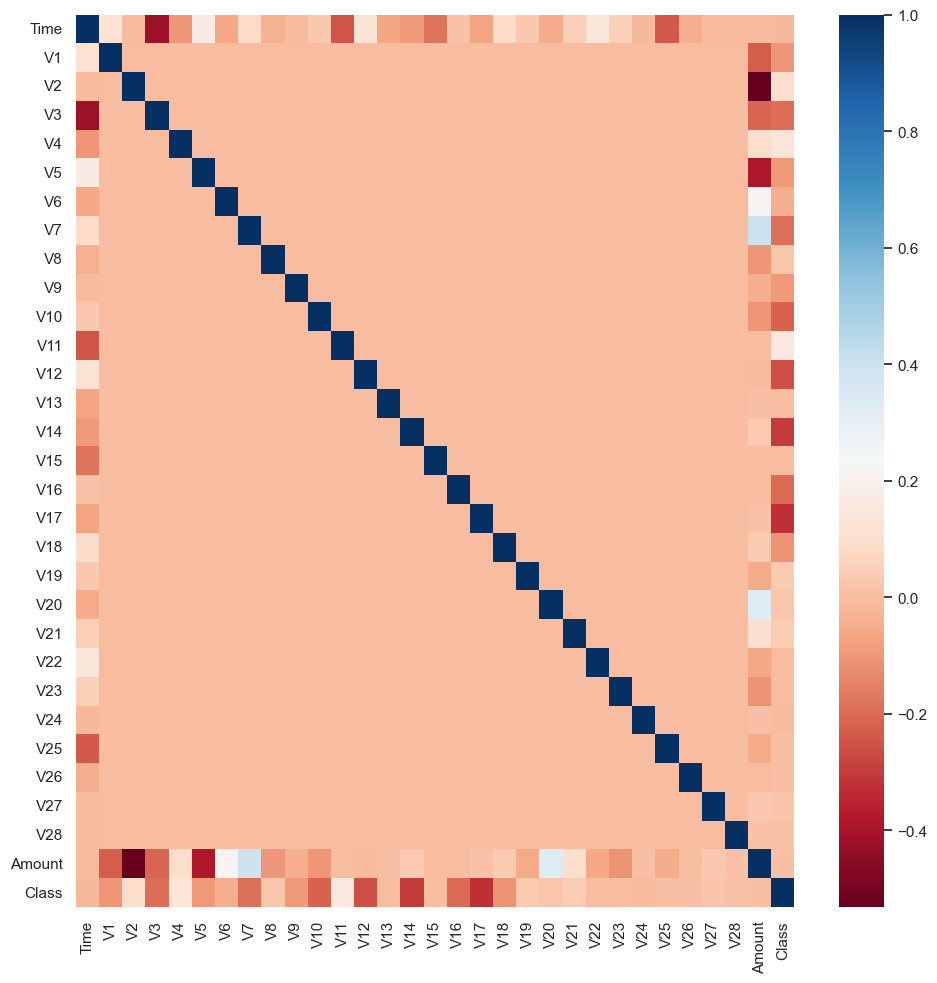

In [25]:
#We want to know if there are features that influence heavily whether a specific transaction is a fraud.
#However, it is important that we use the correct DataFrame (subsample) in order for us to see which features have a
#high positive or negative correlation with regard to fraudulent transactions. So, we use correlation matrix.

corr = credit_card.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu')

plt.tight_layout()
plt.show()
     

0   1.00
1   0.00
Name: Class, dtype: float64


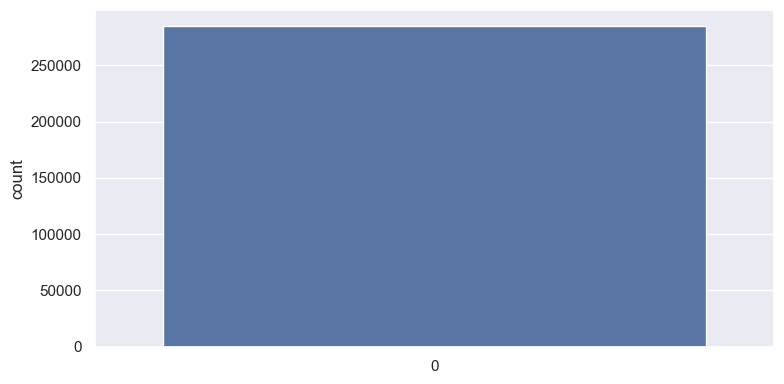

In [49]:
print(credit_card['Class'].value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(credit_card['Class'])

plt.tight_layout()
plt.show()

In [28]:
#Data Pre-processing
scaler = StandardScaler()

credit_card['std_amount'] = scaler.fit_transform(credit_card['Amount'].values.reshape(-1, 1))
credit_card['std_time'] = scaler.fit_transform(credit_card['Time'].values.reshape(-1, 1))

credit_card.drop(['Amount', 'Time'], axis=1, inplace=True)

credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0,0.24,-2.00
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,0,-0.34,-2.00
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,0,1.16,-2.00
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0,0.14,-2.00
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,0,-0.07,-2.00


In [35]:
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']
scalar = StandardScaler()
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [36]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)

VALIDATION: X_validate: (39873, 30), y_validate: (39873,)

TESTING: X_test: (85443, 30), y_test: (85443,)


0   0.50
1   0.50
Name: Class, dtype: float64


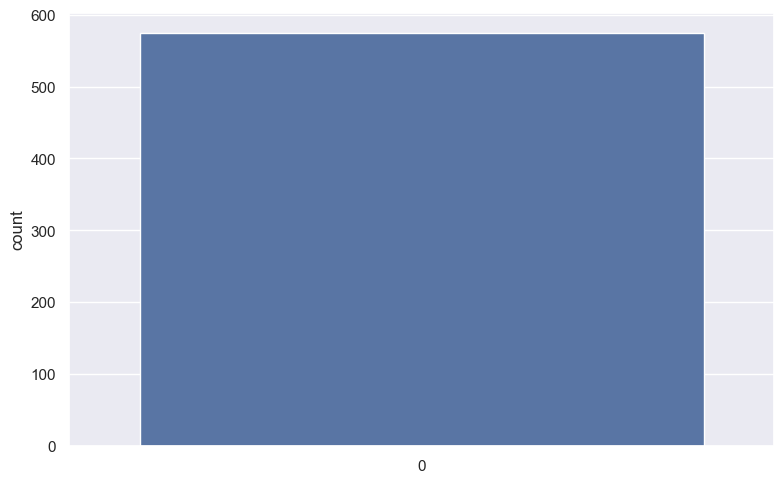

In [41]:
#RandomUnderSampler class to balance X_train and y_train
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(pd.Series(y_rus).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus)

plt.tight_layout()
plt.show()

0   0.50
1   0.50
Name: Class, dtype: float64


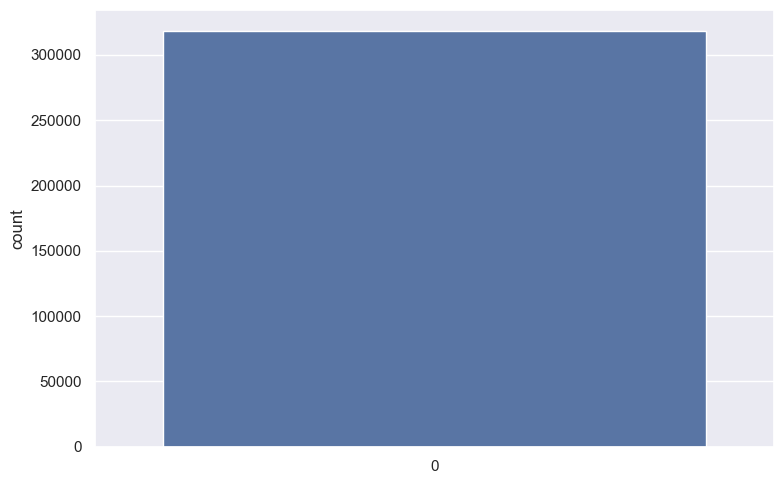

In [42]:
#the RandomOverSampler class to balance the data. We'll train models with both balancement methods and compare the results.
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print(pd.Series(y_ros).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_ros)

plt.tight_layout()
plt.show()
     

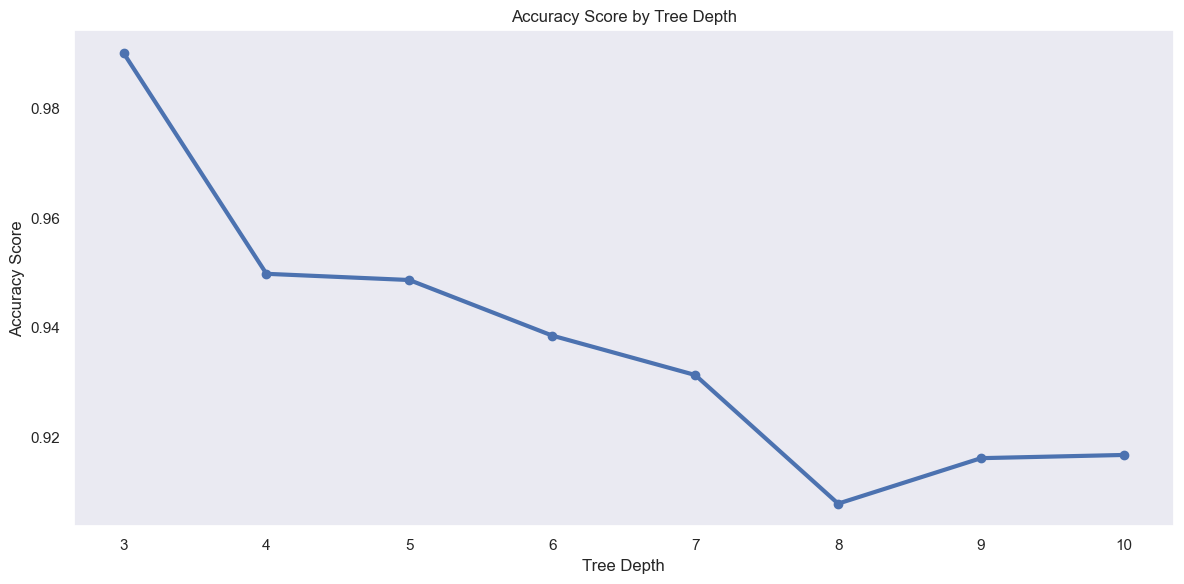

The best accuracy was 0.9902 with depth=3.


In [53]:
#Models
#Decision Tree
#Setting the maximum depth of the tree is important to avoid problems like overfitting. 
#In order to find the best possible depth for the tree, we'll create models with a range of different depths and 
#then see which one provided the best result. We'll then use this best depth to create and evaluate the final 
#decision tree model.
n = 11
acc_tree = np.zeros((n-3))

for i in range(3, n):

    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)

    tree.fit(X_rus, y_rus)

    y_pred_tree = tree.predict(X_test)

    acc_tree[i-3] = accuracy_score(y_test, y_pred_tree)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(3, n), acc_tree, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Tree Depth')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Tree Depth')
ax.grid(False)

plt.tight_layout()
plt.show()

best_depth = acc_tree.argmax()+3
print(f'The best accuracy was {round(acc_tree.max(), 4)} with depth={best_depth}.') 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.12      0.85      0.22       136

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.61     85443
weighted avg       1.00      0.99      0.99     85443



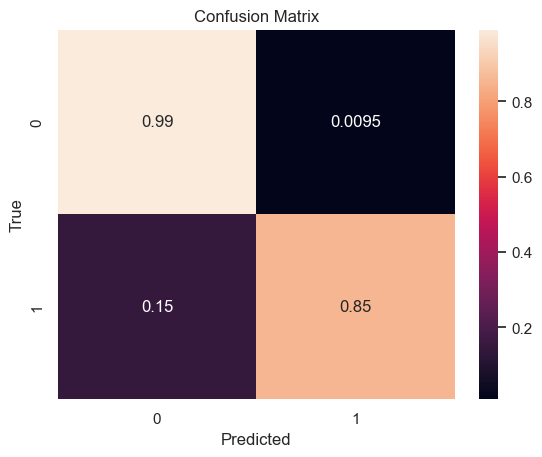

ROC AUC Score: 0.9217


In [56]:
#training model with underbalanced data:
tree_under = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

tree_under.fit(X_rus, y_rus)

y_pred_tree_under = tree_under.predict(X_test)

def report(pred):
    print(classification_report(y_test, pred))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, pred), 4)}')


report(y_pred_tree_under)

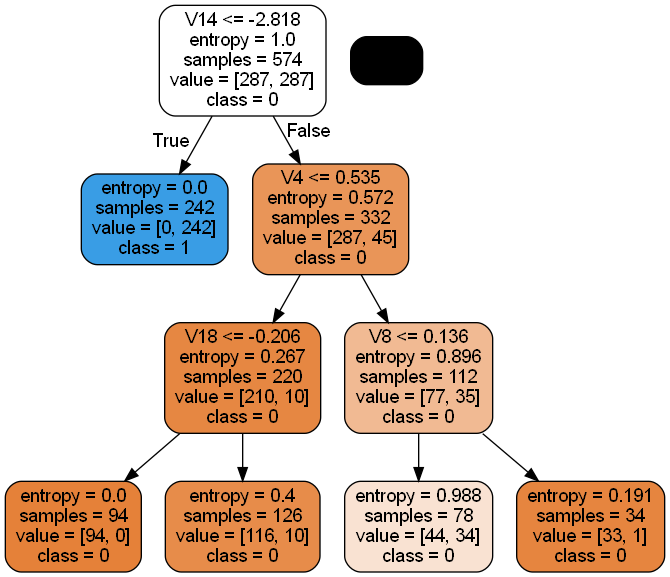

In [69]:
#Visualisation
import pydotplus
dot = export_graphviz(tree_under, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.31      0.83      0.46       136

    accuracy                           1.00     85443
   macro avg       0.66      0.91      0.73     85443
weighted avg       1.00      1.00      1.00     85443



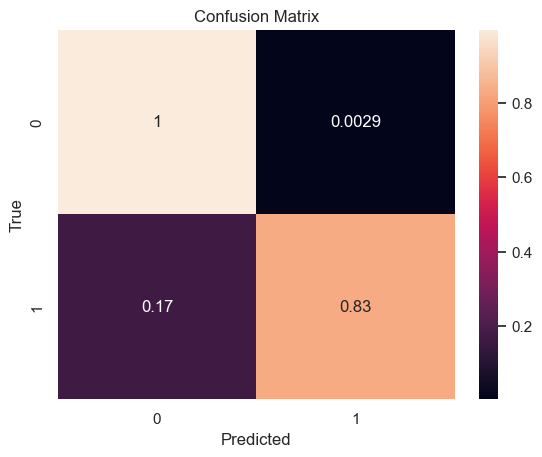

ROC AUC Score: 0.914


In [70]:
tree_over = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

tree_over.fit(X_ros, y_ros)

y_pred_tree_over = tree_over.predict(X_test)

report(y_pred_tree_over)


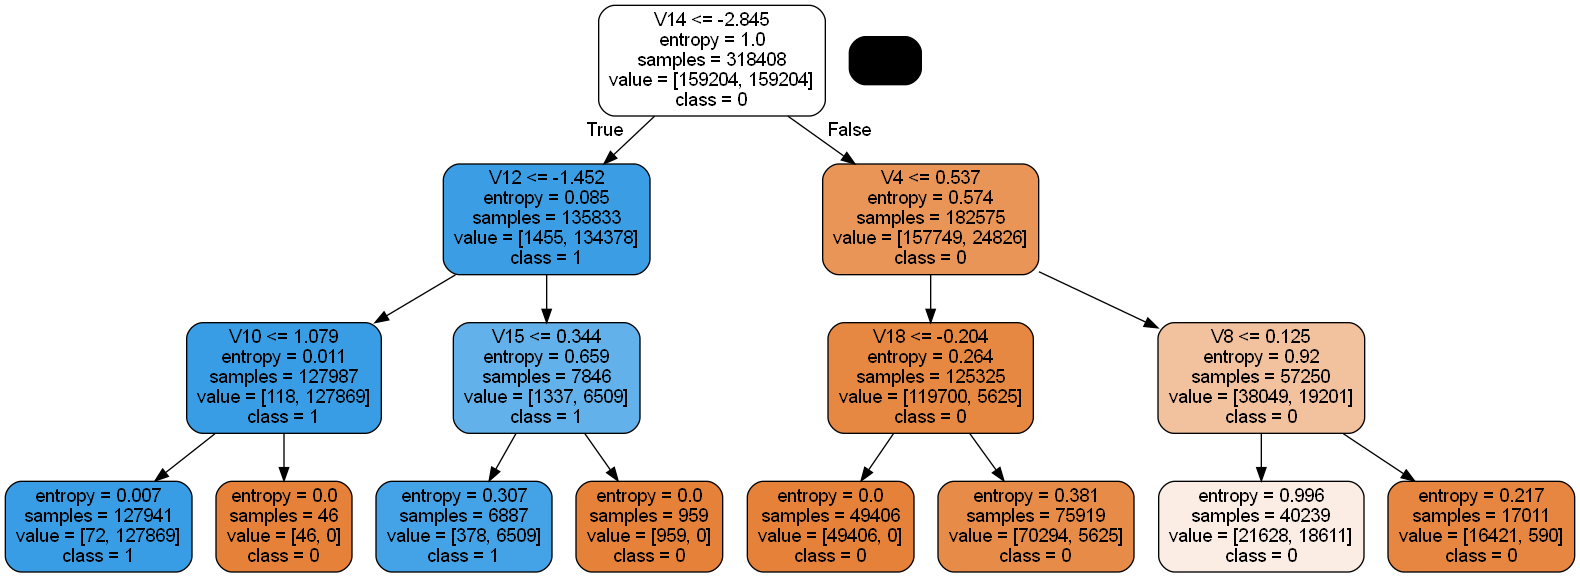

In [71]:
dot = export_graphviz(tree_over, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

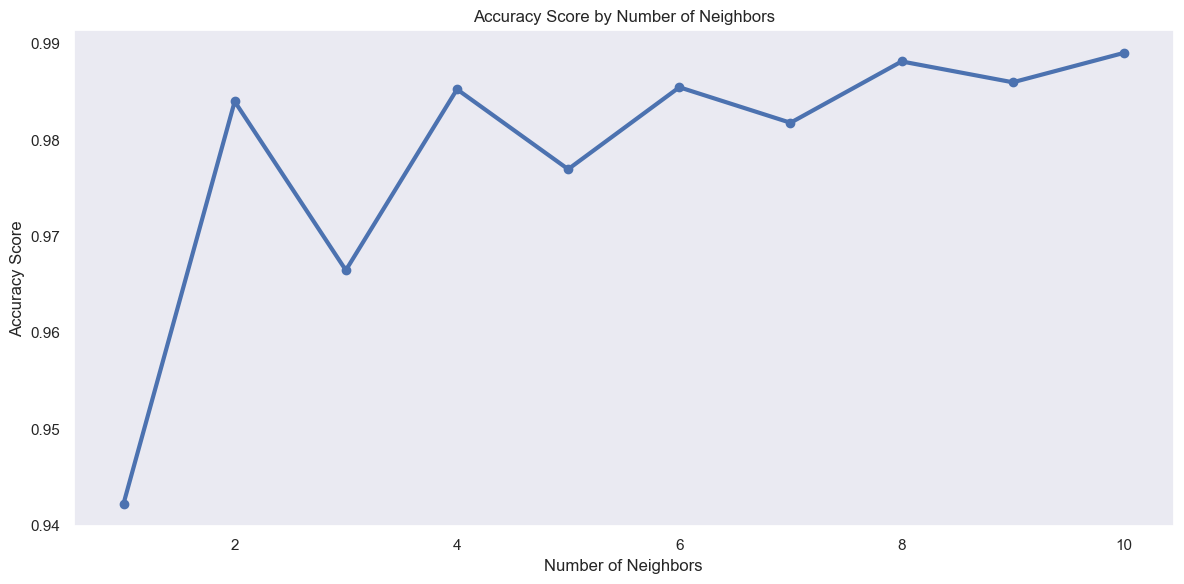

The best accuracy was 0.9891 with k=10.


In [75]:
#KNN model
Ks = 11
acc_knn = np.zeros((Ks-1))

for k in range(1, Ks):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rus, y_rus)

    y_pred_knn = knn.predict(X_test)

    acc_knn[k-1] = accuracy_score(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1, Ks), acc_knn, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Number of Neighbors')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Number of Neighbors')
ax.grid(False)

plt.tight_layout()
plt.show()

best_k = acc_knn.argmax()+1
print(f'The best accuracy was {round(acc_knn.max(), 4)} with k={best_k}.') 


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.12      0.90      0.21       136

    accuracy                           0.99     85443
   macro avg       0.56      0.95      0.60     85443
weighted avg       1.00      0.99      0.99     85443



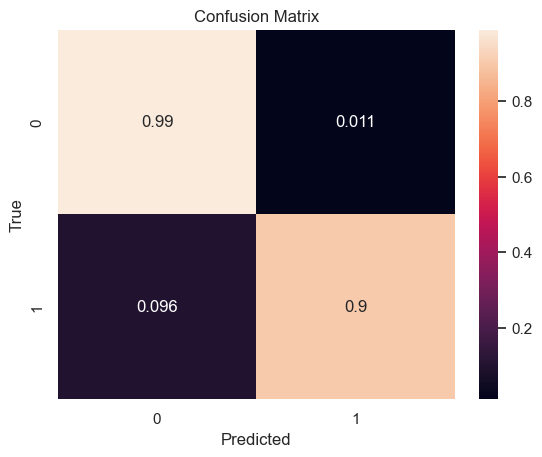

ROC AUC Score: 0.9468


In [78]:
#Training the model with the underbalanced data
knn_under = KNeighborsClassifier(n_neighbors=best_k)

knn_under.fit(X_rus, y_rus)

y_pred_knn_under = knn_under.predict(X_test)

def report1(pred):
    print(classification_report(y_test, pred))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, pred), 4)}')

report1(y_pred_knn_under)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.55      0.88      0.68       136

    accuracy                           1.00     85443
   macro avg       0.77      0.94      0.84     85443
weighted avg       1.00      1.00      1.00     85443



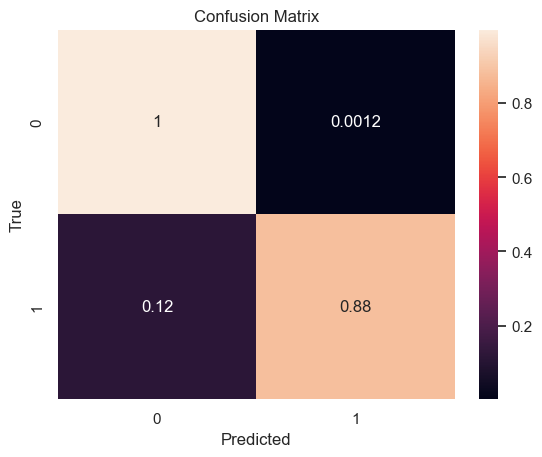

ROC AUC Score: 0.9406


In [80]:
#training the model with the overbalanced data
knn_over = KNeighborsClassifier(n_neighbors=best_k)

knn_over.fit(X_ros, y_ros)

y_pred_knn_over = knn_over.predict(X_test)

report1(y_pred_knn_over)

In [82]:
summary = pd.DataFrame(data={
'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'roc_auc'],
'decision_trees_under': [accuracy_score(y_test, y_pred_tree_under), precision_score(y_test, y_pred_tree_under), recall_score(y_test, y_pred_tree_under), f1_score(y_test, y_pred_tree_under), roc_auc_score(y_test, y_pred_tree_under)],
'decision_trees_over': [accuracy_score(y_test, y_pred_tree_over), precision_score(y_test, y_pred_tree_over), recall_score(y_test, y_pred_tree_over), f1_score(y_test, y_pred_tree_over), roc_auc_score(y_test, y_pred_tree_over)],
'knn_under': [accuracy_score(y_test, y_pred_knn_under), precision_score(y_test, y_pred_knn_under), recall_score(y_test, y_pred_knn_under), f1_score(y_test, y_pred_knn_under), roc_auc_score(y_test, y_pred_knn_under)],
'knn_over': [accuracy_score(y_test, y_pred_knn_over), precision_score(y_test, y_pred_knn_over), recall_score(y_test, y_pred_knn_over), f1_score(y_test, y_pred_knn_over), roc_auc_score(y_test, y_pred_knn_over)]
}).set_index('labels')
summary.index.name = None

summary

,decision_trees_under,decision_trees_over,knn_under,knn_over
Accuracy,0.99,1.00,0.99,1.00
Precision,0.12,0.31,0.12,0.55
Recall,0.85,0.83,0.90,0.88
F1_score,0.22,0.46,0.21,0.68
roc_auc,0.92,0.91,0.95,0.94


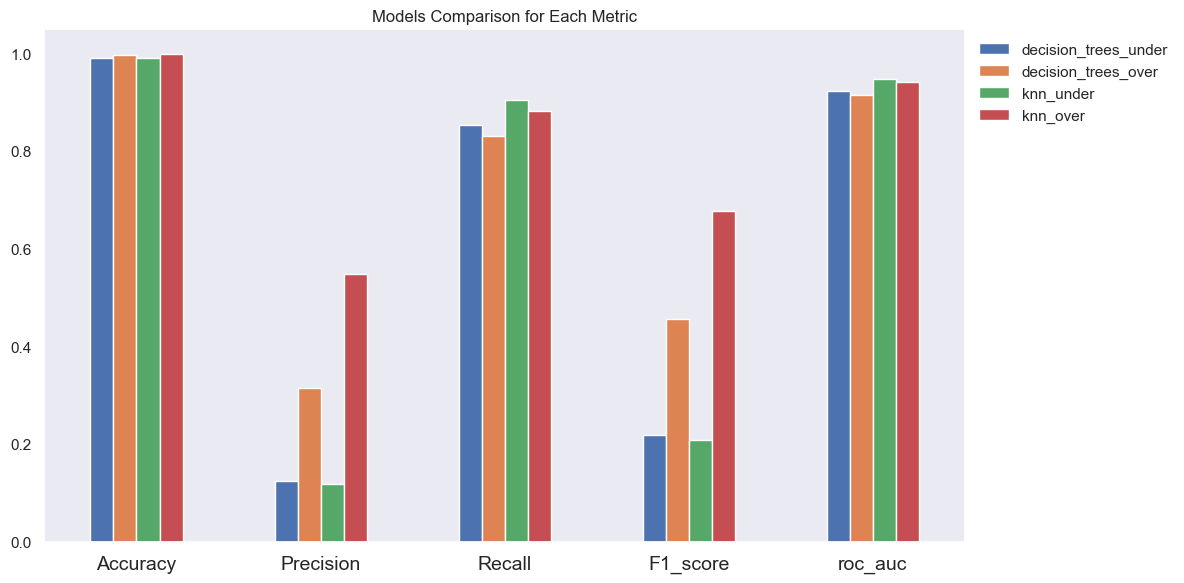

In [83]:
fig, ax = plt.subplots(figsize=(12, 6))
summary.plot.bar(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)
ax.grid(False)
ax.set_title('Models Comparison for Each Metric')

plt.xticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()